In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
from google.colab import files
warnings.filterwarnings('ignore')

# Charger le fichier des villes
uploaded_data= files.upload()

Saving villes.csv to villes.csv


In [ ]:
data_villes = pd.read_csv('./villes.csv', sep=';')
data_villes.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [ ]:
# Extraire les températures moyennes (colonnes 1 à 12) et les labels (villes)
X_villes = data_villes.iloc[:, 1:13].values # Temperature
labeles_villes = data_villes.iloc[:, 0].values # Ville

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardiser les données
scaler = StandardScaler()
X_villes_scaled = scaler.fit_transform(X_villes)

# Appliquer l'ACP
pca_villes = PCA()
X_villes_pca = pca_villes.fit_transform(X_villes_scaled)

# Calculer la variance explique cumulee
explained_variance_villes = np.cumsum(pca_villes.explained_variance_ratio_)

# trouver le nombre de composantes pour 70% de variance
num_components = np.argmax(explained_variance_villes >= 0.7) + 1
print(f"Nombre de composantes pour conserver 70% de l'information: {num_components}")

Nombre de composantes pour conserver 70% de l'information: 1


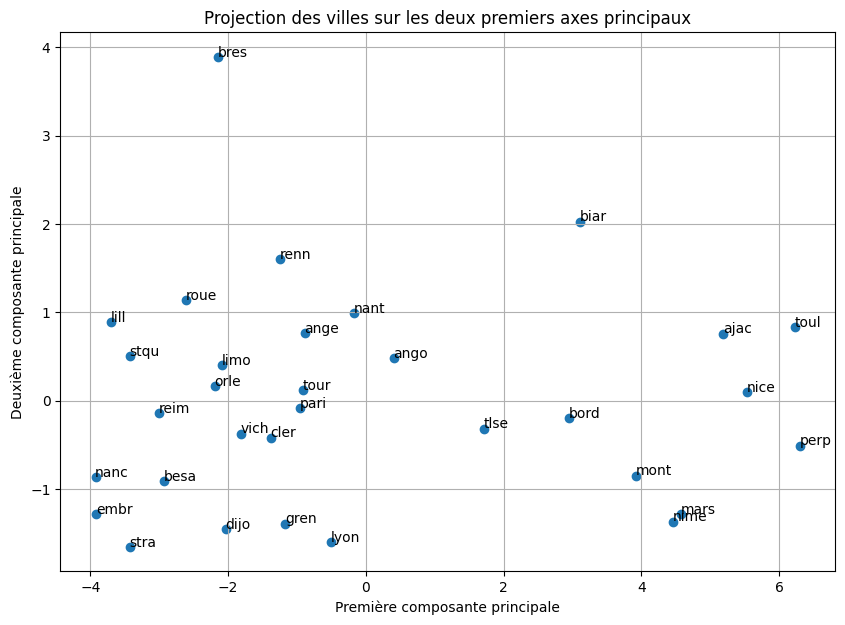

In [ ]:
# Visualiser les villes projetées dans le plan principal (les deux premières composantes)
plt.figure(figsize=(10, 7))
plt.scatter(X_villes_pca[:, 0], X_villes_pca[:, 1])

# Annoter les villes
for label, x, y in zip(labeles_villes, X_villes_pca[:, 0], X_villes_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.title('Projection des villes sur les deux premiers axes principaux')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.grid(True)
plt.show()


## Clustering


In [ ]:
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

# definir le nombre de clusters
n_clusters = 3

# Appliquer K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clustering = kmeans.fit_predict(X_villes_pca) # Utiliser les donnees transforme par l'ACP

# Visualiser les villes projetees dans le plan principal avec les clusters
colors = ['red', 'yellow', 'blue'] # definir les couleurs pour les clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_villes_pca[:, 0], X_villes_pca[:, 1], c=clustering, cmap= matplotlib.colors.listedColormap(colors))

# Annoter chaque ville
for label, x, y, in zip(labeles_villes, X_villes_pca[:, 0], X_villes_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.title('Clustering des villes (K-Means avec 3 clusters)')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.grid(True)
plt.show()


AttributeError: module 'matplotlib.colors' has no attribute 'listedColormap'

<Figure size 1000x700 with 0 Axes>